# Vehicle Loan Default Prediction - Data Exploration and Analysis

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#Setting Visualization Style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size']=10

In [51]:
#Loading data
df = train_data = pd.read_csv("../data/train.csv")
print(f"Shape: {df.shape}")

Shape: (233154, 41)


# 1. Initial Data Inspection

In [52]:
df.head(5)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [53]:
#Basic data information
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  str    
 9   Employment.Type                      225493 non-null  str    
 10  DisbursalDate                        233154 non-null  str    
 11  State_ID                

In [55]:
# Display Column names
print(f"Total Columns : {len(df.columns)}")

for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Total Columns : 41
1. UniqueID
2. disbursed_amount
3. asset_cost
4. ltv
5. branch_id
6. supplier_id
7. manufacturer_id
8. Current_pincode_ID
9. Date.of.Birth
10. Employment.Type
11. DisbursalDate
12. State_ID
13. Employee_code_ID
14. MobileNo_Avl_Flag
15. Aadhar_flag
16. PAN_flag
17. VoterID_flag
18. Driving_flag
19. Passport_flag
20. PERFORM_CNS.SCORE
21. PERFORM_CNS.SCORE.DESCRIPTION
22. PRI.NO.OF.ACCTS
23. PRI.ACTIVE.ACCTS
24. PRI.OVERDUE.ACCTS
25. PRI.CURRENT.BALANCE
26. PRI.SANCTIONED.AMOUNT
27. PRI.DISBURSED.AMOUNT
28. SEC.NO.OF.ACCTS
29. SEC.ACTIVE.ACCTS
30. SEC.OVERDUE.ACCTS
31. SEC.CURRENT.BALANCE
32. SEC.SANCTIONED.AMOUNT
33. SEC.DISBURSED.AMOUNT
34. PRIMARY.INSTAL.AMT
35. SEC.INSTAL.AMT
36. NEW.ACCTS.IN.LAST.SIX.MONTHS
37. DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS
38. AVERAGE.ACCT.AGE
39. CREDIT.HISTORY.LENGTH
40. NO.OF_INQUIRIES
41. loan_default


# 2. Target Variable Analysis

In [65]:
target_col = 'loan_default'

print("Target Variable Distributions")
print("="*50)
print(df[target_col].value_counts())
print("Percentage Distribution:")
print(df[target_col].value_counts(normalize=True)*100)

#Calculate imbalance ratio
class_counts = df[target_col].value_counts()
print(f"Minority Class (Default): {class_counts[1]} -> ({class_counts[1]/len(df)*100:.2f})%")
print(f"Majority Class (Default): {class_counts[0]} -> ({class_counts[0]/len(df)*100:.2f})%")


Target Variable Distributions
loan_default
0    182543
1     50611
Name: count, dtype: int64
Percentage Distribution:
loan_default
0    78.292888
1    21.707112
Name: proportion, dtype: float64
Minority Class (Default): 50611 -> (21.71)%
Majority Class (Default): 182543 -> (78.29)%


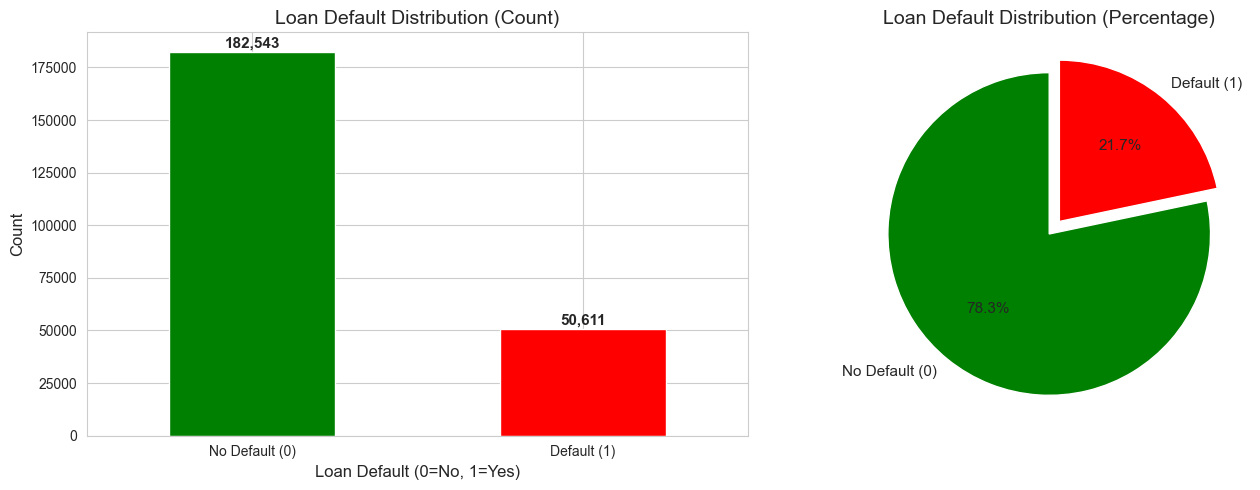

In [90]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
ax1 = axes[0]
class_counts.plot(kind='bar', ax=ax1, color=['Green', 'Red'])
ax1.set_title('Loan Default Distribution (Count)', fontsize=14)
ax1.set_xlabel('Loan Default (0=No, 1=Yes)', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xticklabels(['No Default (0)', 'Default (1)'], rotation=0)
for i, v in enumerate(class_counts):
    ax1.text(i, v + 2000, f'{v:,}', ha='center', fontsize=11, fontweight='bold')

# Pie chart
ax2 = axes[1]
colors = ['Green', 'Red']
ax2.pie(class_counts, labels=['No Default (0)', 'Default (1)'], autopct='%1.1f%%',
        startangle=90, colors=colors, explode=explode, textprops={'fontsize': 11})
ax2.set_title('Loan Default Distribution (Percentage)', fontsize=14,)

plt.tight_layout()
plt.show()

# 3. Missing Value Analysis


In [96]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
).reset_index(drop=True)

print(missing_data)
print(f"Total columns with missing values: {len(missing_data)}")

            Column  Missing_Count  Missing_Percentage
0  Employment.Type           7661            3.285811
Total columns with missing values: 1


# 4. Data Types and Feature Categories

In [100]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
date_features = [col for col in df.columns if 'date' in col.lower() or 'Date' in col]

# Remove target from numerical features
if target_col in numerical_features:
    numerical_features.remove(target_col)

print("Feature Type Summary:")
print("="*60)
print(f"Numerical Features: {len(numerical_features)}")
print(f"Categorical Features: {len(categorical_features)}")
print(f"Date Features: {len(date_features)}")
print(f"Target Variable: 1 ({target_col})")
print(f"\nTotal: {len(numerical_features) + len(categorical_features) + len(date_features) + 1}")

Feature Type Summary:
Numerical Features: 34
Categorical Features: 6
Date Features: 2
Target Variable: 1 (loan_default)

Total: 43


In [111]:
# numerical features
print("\nNumerical Features:")
print("-" * 60)
for i, j in enumerate(numerical_features, 1):
    print(f"{i:2d}. {j}")


Numerical Features:
------------------------------------------------------------
 1. UniqueID
 2. disbursed_amount
 3. asset_cost
 4. ltv
 5. branch_id
 6. supplier_id
 7. manufacturer_id
 8. Current_pincode_ID
 9. State_ID
10. Employee_code_ID
11. MobileNo_Avl_Flag
12. Aadhar_flag
13. PAN_flag
14. VoterID_flag
15. Driving_flag
16. Passport_flag
17. PERFORM_CNS.SCORE
18. PRI.NO.OF.ACCTS
19. PRI.ACTIVE.ACCTS
20. PRI.OVERDUE.ACCTS
21. PRI.CURRENT.BALANCE
22. PRI.SANCTIONED.AMOUNT
23. PRI.DISBURSED.AMOUNT
24. SEC.NO.OF.ACCTS
25. SEC.ACTIVE.ACCTS
26. SEC.OVERDUE.ACCTS
27. SEC.CURRENT.BALANCE
28. SEC.SANCTIONED.AMOUNT
29. SEC.DISBURSED.AMOUNT
30. PRIMARY.INSTAL.AMT
31. SEC.INSTAL.AMT
32. NEW.ACCTS.IN.LAST.SIX.MONTHS
33. DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS
34. NO.OF_INQUIRIES


In [109]:
# categorical features
print("\nCategorical Features:")
print("-" * 60)
for i, j in enumerate(categorical_features, 1):
    unique_count = df[j].nunique()
    print(f"{i}. {j} (Unique values: {unique_count})")


Categorical Features:
------------------------------------------------------------
1. Date.of.Birth (Unique values: 15433)
2. Employment.Type (Unique values: 2)
3. DisbursalDate (Unique values: 84)
4. PERFORM_CNS.SCORE.DESCRIPTION (Unique values: 20)
5. AVERAGE.ACCT.AGE (Unique values: 192)
6. CREDIT.HISTORY.LENGTH (Unique values: 294)


In [107]:
# date features
print("\nDate Features:")
print("-" * 60)
for i, j in enumerate(date_features, 1):
    print(f"{i}. {j}")
    print(f"Sample values: {df[j].head(3).tolist()}")


Date Features:
------------------------------------------------------------
1. Date.of.Birth
Sample values: ['01-01-84', '31-07-85', '24-08-85']
2. DisbursalDate
Sample values: ['03-08-18', '26-09-18', '01-08-18']


# 5. Summary Statistics for Numerical Features

In [113]:
print("Summary Statistics for Numerical Features:")
print("="*80)

df[numerical_features].describe().T

Summary Statistics for Numerical Features:


,count,mean,std,min,25%,50%,75%,max
UniqueID,233154.0,535917.573376,6.831569e+04,417428.00,476786.25,535978.5,595039.75,6.710840e+05
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
branch_id,233154.0,72.936094,6.983499e+01,1.00,14.00,61.0,130.00,2.610000e+02
supplier_id,233154.0,19638.635035,3.491950e+03,10524.00,16535.00,20333.0,23000.00,2.480300e+04
manufacturer_id,233154.0,69.028054,2.214130e+01,45.00,48.00,86.0,86.00,1.560000e+02
Current_pincode_ID,233154.0,3396.880247,2.238148e+03,1.00,1511.00,2970.0,5677.00,7.345000e+03
State_ID,233154.0,7.262243,4.482230e+00,1.00,4.00,6.0,10.00,2.200000e+01
Employee_code_ID,233154.0,1549.477148,9.752613e+02,1.00,713.00,1451.0,2362.00,3.795000e+03


# 6. Correlation Analysis

In [116]:
# correlations with target variable
correlations = df[numerical_features + [target_col]].corr()[target_col].drop(target_col)
correlations = correlations.sort_values(ascending=False)

print("Top 20 Features Correlated with Loan Default:")
print("="*60)
print(correlations.head(20))

Top 20 Features Correlated with Loan Default:
ltv                                    0.098208
disbursed_amount                       0.077675
State_ID                               0.048075
VoterID_flag                           0.043747
NO.OF_INQUIRIES                        0.043678
PRI.OVERDUE.ACCTS                      0.040872
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.034462
UniqueID                               0.033848
branch_id                              0.030193
Current_pincode_ID                     0.028419
supplier_id                            0.027357
Employee_code_ID                       0.020657
asset_cost                             0.014261
PAN_flag                               0.002046
SEC.OVERDUE.ACCTS                     -0.001371
SEC.INSTAL.AMT                        -0.001548
SEC.CURRENT.BALANCE                   -0.005531
Driving_flag                          -0.005821
SEC.ACTIVE.ACCTS                      -0.005993
SEC.DISBURSED.AMOUNT                  -0.0

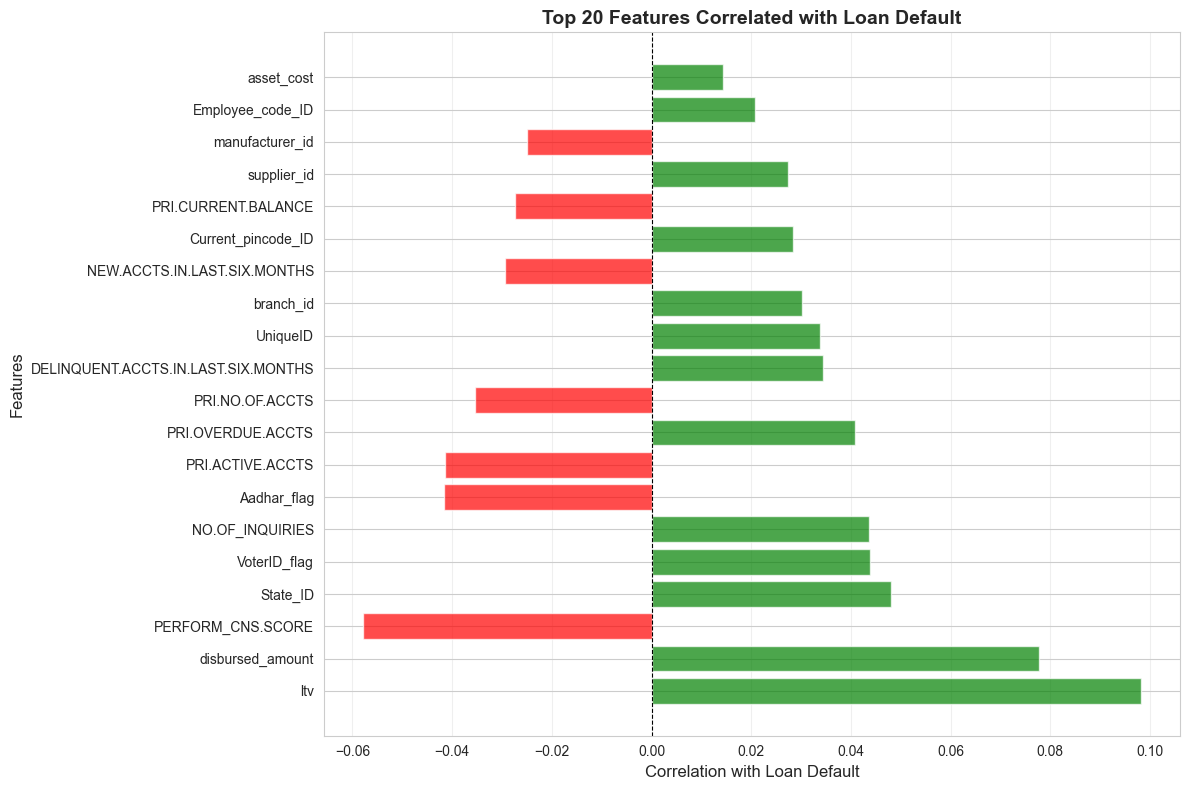

In [119]:
#top correlations
top_n = 20
top_corr = correlations.abs().nlargest(top_n)

plt.figure(figsize=(12, 8))
colors = ['green' if x > 0 else 'red' for x in correlations[top_corr.index]]
plt.barh(range(len(top_corr)), correlations[top_corr.index], color=colors, alpha=0.7)
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Correlation with Loan Default', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title(f'Top {top_n} Features Correlated with Loan Default', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

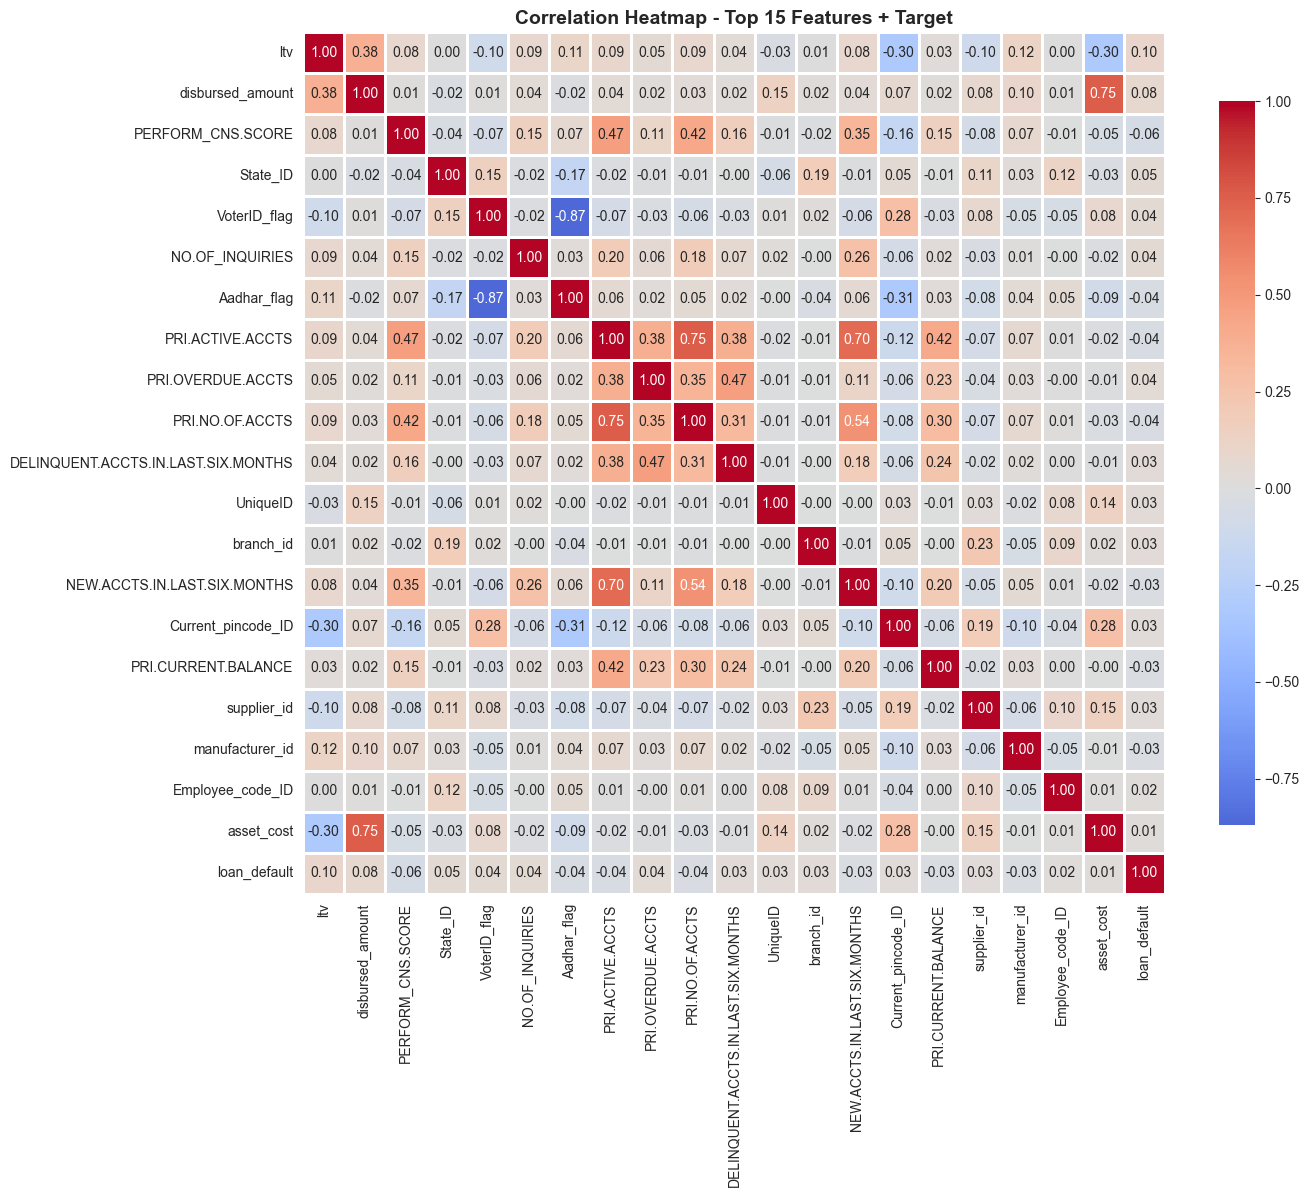

In [121]:
# Correlation heatmap for top features
top_features = correlations.abs().nlargest(20).index.tolist()
top_features.append(target_col)

plt.figure(figsize=(14, 12))
corr_matrix = df[top_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Top 15 Features + Target', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 7. Distribution Analysis of Key Features¶

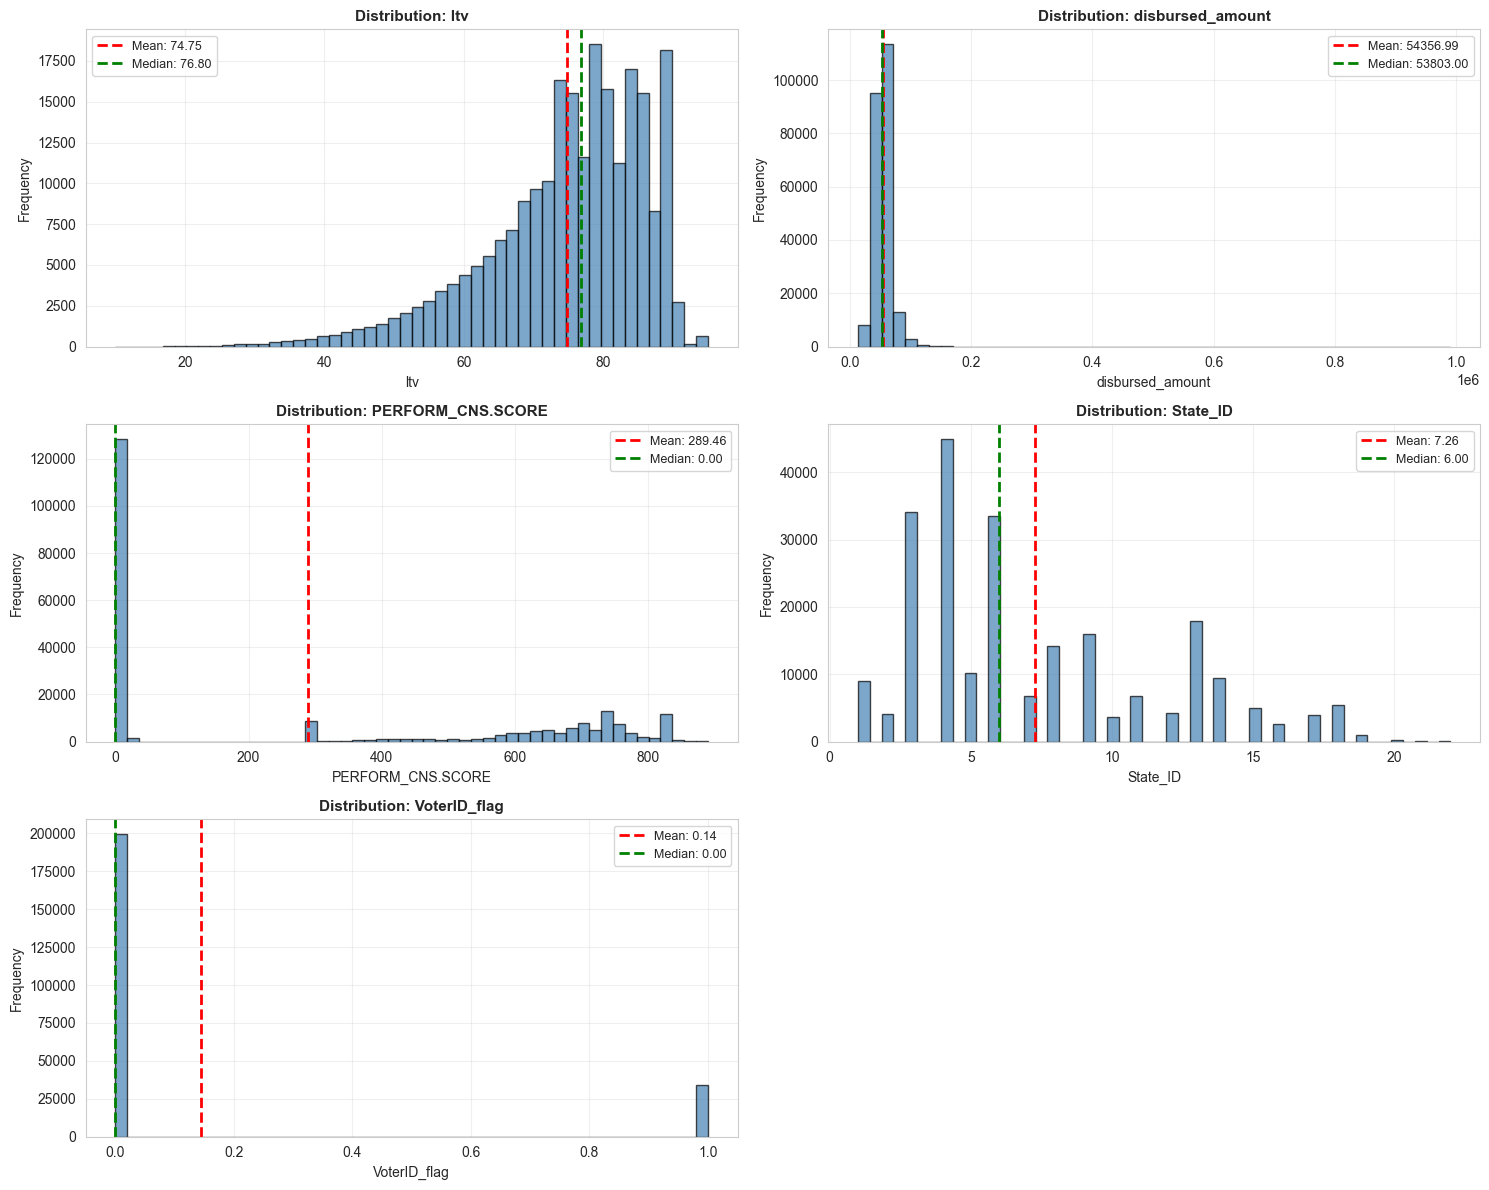

In [126]:
# Analyze distributions of top correlated features
top_5_features = correlations.abs().nlargest(5).index.tolist()

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, feature in enumerate(top_5_features):
    ax = axes[idx]
    
    # Histogram
    df[feature].hist(bins=50, ax=ax, alpha=0.7, color='steelblue', edgecolor='black')
    ax.set_title(f'Distribution: {feature}', fontsize=11, fontweight='bold')
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(alpha=0.3)
    
    # Add statistics
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    ax.legend(fontsize=9)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# 9. Categorical Features Analysis

In [127]:
# Analyze categorical features
print("Categorical Features Analysis:")
print("="*80)

for i in categorical_features:
    print(f"\n{i}:")
    print("-" * 60)
    value_counts = df[i].value_counts()
    print(f"Unique values: {len(value_counts)}")
    print(f"\nTop 10 values:")
    print(value_counts.head(10))
    
    # Default rate by category
    if len(value_counts) <= 20:  # Only for features with reasonable number of categories
        default_rate = df.groupby(i)[target_col].mean().sort_values(ascending=False)
        print(f"\nDefault rate by {i}:")
        print(default_rate.head(10))

Categorical Features Analysis:

Date.of.Birth:
------------------------------------------------------------
Unique values: 15433

Top 10 values:
Date.of.Birth
01-01-88    2173
01-01-90    2170
01-01-87    2127
01-01-86    2063
01-01-85    2005
01-01-91    1985
01-01-89    1962
01-01-93    1930
01-01-95    1924
01-01-92    1924
Name: count, dtype: int64

Employment.Type:
------------------------------------------------------------
Unique values: 2

Top 10 values:
Employment.Type
Self employed    127635
Salaried          97858
Name: count, dtype: int64

Default rate by Employment.Type:
Employment.Type
Self employed    0.227657
Salaried         0.203458
Name: loan_default, dtype: float64

DisbursalDate:
------------------------------------------------------------
Unique values: 84

Top 10 values:
DisbursalDate
31-10-18    8826
24-10-18    6701
31-08-18    6690
23-10-18    6440
26-10-18    6215
25-10-18    5944
22-10-18    5928
30-10-18    5837
30-08-18    4664
29-10-18    4389
Name: count

# 10. Key Insights and Summary

In [128]:
print("="*80)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("="*80)

print(f"\n1. DATASET OVERVIEW:")
print(f"   - Total records: {len(df):,}")
print(f"   - Total features: {len(df.columns) - 1}")
print(f"   - Numerical features: {len(numerical_features)}")
print(f"   - Categorical features: {len(categorical_features)}")
print(f"   - Date features: {len(date_features)}")

print(f"\n2. TARGET VARIABLE (Loan Default):")
print(f"   - Default rate: {class_counts[1]/len(df)*100:.2f}%")
print(f"   - Class imbalance ratio: {imbalance_ratio:.2f}:1")
print(f"   - ⚠️ SIGNIFICANT CLASS IMBALANCE DETECTED")
print(f"   - Action required: Use class weighting or SMOTE during training")

print(f"\n3. MISSING VALUES:")
if len(missing_data) > 0:
    print(f"   - Columns with missing values: {len(missing_data)}")
    print(f"   - Most affected: {missing_data.iloc[0]['Column']} ({missing_data.iloc[0]['Missing_Percentage']:.2f}%)")
    print(f"   - Action required: Imputation strategy needed")
else:
    print(f"   - ✓ No missing values detected")

print(f"\n4. TOP PREDICTIVE FEATURES:")
for i, (feat, corr) in enumerate(correlations.abs().nlargest(5).items(), 1):
    print(f"   {i}. {feat}: {correlations[feat]:.4f}")

print(f"\n5. NEXT STEPS:")
print(f"   ✓ Proceed to data preprocessing and feature engineering")
print(f"   ✓ Handle missing values using appropriate imputation")
print(f"   ✓ Create derived features from dates and credit history")
print(f"   ✓ Encode categorical variables")
print(f"   ✓ Scale numerical features")
print(f"   ✓ Address class imbalance during model training")

print("\n" + "="*80)

KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW:
   - Total records: 233,154
   - Total features: 40
   - Numerical features: 34
   - Categorical features: 6
   - Date features: 2

2. TARGET VARIABLE (Loan Default):
   - Default rate: 21.71%
   - Class imbalance ratio: 3.61:1
   - ⚠️ SIGNIFICANT CLASS IMBALANCE DETECTED
   - Action required: Use class weighting or SMOTE during training

3. MISSING VALUES:
   - Columns with missing values: 1
   - Most affected: Employment.Type (3.29%)
   - Action required: Imputation strategy needed

4. TOP PREDICTIVE FEATURES:
   1. ltv: 0.0982
   2. disbursed_amount: 0.0777
   3. PERFORM_CNS.SCORE: -0.0579
   4. State_ID: 0.0481
   5. VoterID_flag: 0.0437

5. NEXT STEPS:
   ✓ Proceed to data preprocessing and feature engineering
   ✓ Handle missing values using appropriate imputation
   ✓ Create derived features from dates and credit history
   ✓ Encode categorical variables
   ✓ Scale numerical features
   ✓ Address class imbalance d

# Decide if we should drop the Current_pincode

In [129]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('your_data.csv')

def analyze_pincodes(df, col1, col2, target):
    print("--- Basic Statistics ---")
    print(f"Unique values in {col1}: {df[col1].nunique()}")
    print(f"Unique values in {col2}: {df[col2].nunique()}")
    
    # 1. Check for Exact Duplication
    match_rate = (df[col1] == df[col2]).mean() * 100
    print(f"\nMatch Rate: {match_rate:.2f}% of rows have identical pincodes.")
    
    # 2. Correlation with Target (Using Mean Default Rate per Pincode)
    # We calculate the average default rate for each pincode to see if it's predictive
    pincode1_risk = df.groupby(col1)[target].mean().std()
    pincode2_risk = df.groupby(col2)[target].mean().std()
    
    print(f"\n--- Variance in Default Rate ---")
    print(f"Standard Deviation of default rate for {col1}: {pincode1_risk:.4f}")
    print(f"Standard Deviation of default rate for {col2}: {pincode2_risk:.4f}")
    
    # 3. Visualizing the Overlap
    plt.figure(figsize=(10, 6))
    sns.heatmap(pd.crosstab(df[col1].head(1000), df[col2].head(1000)), cmap="YlGnBu")
    plt.title("Pincode Correlation Heatmap (Sample)")
    plt.show()

# Run the analysis
analyze_pincodes(df, 'Current_pincode_1', 'Current_pincode_2', 'loan_default')